## 地理/逆地理编码

In [1]:
import pandas as pd
import requests
key_lm ="f0183da43a88b7aebe01c94037aec7b1"

def geocode(address,city=None,batch=None,sig=None)->dict:
    """获取地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/geo?parameters'
    params={
        'key': key_lm,
        'address':address,
        'city':city,
        'batch':batch,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
桂江小学 = geocode(address='广东省佛山市南海区桂江小学')
print(桂江小学)
df_桂江小学地理编码 = pd.json_normalize(桂江小学['geocodes'])
display(df_桂江小学地理编码)
桂江小学地理编码 = 桂江小学['geocodes'][0]['location']
print("桂江小学地理编码:",桂江小学地理编码)

{'status': '1', 'info': 'OK', 'infocode': '10000', 'count': '1', 'geocodes': [{'formatted_address': '广东省佛山市南海区桂江小学', 'country': '中国', 'province': '广东省', 'citycode': '0757', 'city': '佛山市', 'district': '南海区', 'township': [], 'neighborhood': {'name': [], 'type': []}, 'building': {'name': [], 'type': []}, 'adcode': '440605', 'street': [], 'number': [], 'location': '113.137224,23.063814', 'level': '兴趣点'}]}


,formatted_address,country,province,citycode,city,district,township,adcode,street,number,location,level,neighborhood.name,neighborhood.type,building.name,building.type
0,广东省佛山市南海区桂江小学,中国,广东省,0757,佛山市,南海区,[],440605,[],[],"113.137224,23.063814",兴趣点,[],[],[],[]


桂江小学地理编码: 113.137224,23.063814


In [2]:
# 逆地理编码
def regeocode(location,poitype=None,radius=None,extensions="base",batch=False,roadlevel=None,sig=None,homeorcorp=None)->dict:
    """获取逆地理编码"""
    url = 'https://restapi.amap.com/v3/geocode/regeo?parameters'
    params={
        'key': key_lm,
        'location':location,
        'poitype':poitype,
        'radius':radius,
        'extensions':extensions,
        'batch':batch,
        'roadlevel':roadlevel,
        'homeorcorp':homeorcorp,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

桂江小学逆地理编码_base = regeocode(桂江小学地理编码)
桂江小学逆地理编码 = 桂江小学逆地理编码_base
print(桂江小学逆地理编码)
df_桂江小学逆地理编码 = pd.json_normalize(桂江小学逆地理编码).T
display(df_桂江小学逆地理编码)

{'status': '1', 'regeocode': {'addressComponent': {'city': '佛山市', 'province': '广东省', 'adcode': '440605', 'district': '南海区', 'towncode': '440605011000', 'streetNumber': {'number': '74号', 'location': '113.137431,23.0636564', 'direction': '东南', 'distance': '27.4997', 'street': '南一路'}, 'country': '中国', 'township': '桂城街道', 'businessAreas': [{'location': '113.158203,23.036013', 'name': '桂城', 'id': '440605'}], 'building': {'name': [], 'type': []}, 'neighborhood': {'name': [], 'type': []}, 'citycode': '0757'}, 'formatted_address': '广东省佛山市南海区桂城街道桂江小学'}, 'info': 'OK', 'infocode': '10000'}


,0
status,1
info,OK
infocode,10000
regeocode.addressComponent.city,佛山市
regeocode.addressComponent.province,广东省
regeocode.addressComponent.adcode,440605
regeocode.addressComponent.district,南海区
regeocode.addressComponent.towncode,440605011000
regeocode.addressComponent.streetNumber.number,74号
regeocode.addressComponent.streetNumber.location,"113.137431,23.0636564"


In [28]:
桂江小学逆地理编码_all = regeocode(桂江小学地理编码,extensions="all")
print(桂江小学逆地理编码_all)
df_桂江小学逆地理编码_all = pd.json_normalize(桂江小学逆地理编码_all)
display(df_桂江小学逆地理编码_all)

{'status': '1', 'regeocode': {'roads': [{'id': '0757F49F0120422604', 'location': '113.137,23.0632', 'direction': '北', 'name': '海七路', 'distance': '74.1435'}, {'id': '0757F49F0120421614', 'location': '113.136,23.0637', 'direction': '东', 'name': '南一路', 'distance': '167.927'}, {'id': '0757F49F01204222165', 'location': '113.14,23.0643', 'direction': '西', 'name': '南海大道北辅路', 'distance': '268.227'}], 'roadinters': [{'second_name': '海七路', 'first_id': '0757F49F0120421614', 'second_id': '0757F49F0120422604', 'location': '113.1355581,23.06325', 'distance': '181.603', 'first_name': '南一路', 'direction': '东'}], 'formatted_address': '广东省佛山市南海区桂城街道桂江小学', 'addressComponent': {'city': '佛山市', 'province': '广东省', 'adcode': '440605', 'district': '南海区', 'towncode': '440605011000', 'streetNumber': {'number': '74号', 'location': '113.137431,23.0636564', 'direction': '东南', 'distance': '27.4997', 'street': '南一路'}, 'country': '中国', 'township': '桂城街道', 'businessAreas': [{'location': '113.158203,23.036013', 'name': '桂

,status,info,infocode,regeocode.roads,regeocode.roadinters,regeocode.formatted_address,regeocode.addressComponent.city,regeocode.addressComponent.province,regeocode.addressComponent.adcode,regeocode.addressComponent.district,...,regeocode.addressComponent.country,regeocode.addressComponent.township,regeocode.addressComponent.businessAreas,regeocode.addressComponent.building.name,regeocode.addressComponent.building.type,regeocode.addressComponent.neighborhood.name,regeocode.addressComponent.neighborhood.type,regeocode.addressComponent.citycode,regeocode.aois,regeocode.pois
0,1,OK,10000,"[{'id': '0757F49F0120422604', 'location': '113...","[{'second_name': '海七路', 'first_id': '0757F49F0...",广东省佛山市南海区桂城街道桂江小学,佛山市,广东省,440605,南海区,...,中国,桂城街道,"[{'location': '113.158203,23.036013', 'name': ...",[],[],[],[],0757,"[{'area': '26732.259344', 'type': '141203', 'i...","[{'id': 'B02F5076GB', 'direction': '西', 'busin..."


#### 思考

* 地理编码：将详细的结构化地址转换为高德经纬度坐标。且支持对地标性名胜景区、建筑物名称解析为高德经纬度坐标。逆地理编码：将经纬度转换为详细结构化的地址，且返回附近周边的POI、AOI信息。我认为在调用该功能的时候，用户能够快速找到他们所需要的准确地理坐标，并且也能从坐标中反推出准确的地理位置。这一功能的调用十分的便捷和快速，我认为它是具备ML、AI的功能的。

---

## 路径规划 

In [3]:
def walking(origin,destination,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/walking?parameters'
    params={
        'key':key_lm,
        'origin':origin,
        'destination':destination,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

In [4]:
桂江小学 = geocode('广东省佛山市南海区桂江小学')
桂江二中 = geocode('广东省佛山市南海区桂江二中')
桂江小学_location = 桂江小学['geocodes'][0]['location']
桂江二中_location = 桂江二中['geocodes'][0]['location']
print("(起点)桂江二中_location:",桂江二中_location,"(终点)桂江小学_location:",桂江小学_location)

(起点)桂江二中_location: 113.136395,23.053694 (终点)桂江小学_location: 113.137224,23.063814


In [5]:
桂江二中_桂江小学 = walking(桂江二中_location,桂江小学_location)
df_步行路径规划 = pd.json_normalize(桂江二中_桂江小学["route"]["paths"][0]['steps'])
display(df_步行路径规划)
df_步行路径规划["instruction"]

,instruction,orientation,road,distance,duration,polyline,action,assistant_action,walk_type
0,向西步行90米右转,西,[],90,72,"113.136181,23.053394;113.135456,23.053459;113....",右转,[],0
1,沿南一路向北步行1073米右转,北,南一路,1073,858,"113.135299,23.053477;113.135247,23.055139;113....",右转,[],0
2,沿海七路向东步行144米左转,东,海七路,144,115,"113.135556,23.063247;113.135885,23.063238;113....",左转,[],0
3,向东北步行69米到达目的地,东北,[],69,55,"113.136975,23.063186;113.137005,23.063273;113....",[],到达目的地,0


0          向西步行90米右转
1    沿南一路向北步行1073米右转
2     沿海七路向东步行144米左转
3      向东北步行69米到达目的地
Name: instruction, dtype: object

In [6]:
def integrated(origin,destination,city,cityd=None,extensions='base',strategy=None,nightflag=0,date=None,time=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/direction/transit/integrated?parameters'
    params={
        'key':key_lm,
        'origin':origin,
        'destination':destination,
        'city':city,
        'cityd':cityd,
        'extensions':extensions,
        'strategy':strategy,
        'nightflag':nightflag,
        'date':date,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

# C-2 准备walking 参数
桂江小学 = geocode('广东省佛山市桂江小学')
桂江小学_location = 桂江小学['geocodes'][0]['location']
桂华中学 = geocode('广东省佛山市桂华中学')
桂华中学_location = 桂华中学['geocodes'][0]['location']
print("(起点)桂江小学_location:",桂江小学_location,"(终点)桂华中学_location:",桂华中学_location)

# C-3 公交路径规划
桂江小学_桂华中学 = integrated(桂江小学_location,桂华中学_location,city='佛山',extensions='all')
df_bus = pd.json_normalize(桂江小学_桂华中学)
df_bus

(起点)桂江小学_location: 113.136554,23.063264 (终点)桂华中学_location: 113.150648,23.022201


,status,info,infocode,count,route.origin,route.destination,route.distance,route.taxi_cost,route.transits
0,1,OK,10000,5,"113.136554,23.063264","113.150648,23.022201",5474,16.032400000000003,"[{'cost': '2.0', 'duration': '3584', 'nightfla..."


In [7]:
pd.json_normalize(桂江小学_桂华中学["route"]['transits'])

,cost,duration,nightflag,walking_distance,distance,missed,segments
0,2.0,3584,0,1451,7645,0,"[{'taxi': [], 'walking': {'origin': '113.13655..."
1,4.0,3774,0,758,7406,0,"[{'taxi': [], 'walking': {'origin': '113.13655..."
2,4.0,3720,0,914,6892,0,"[{'taxi': [], 'walking': {'origin': '113.13655..."
3,4.0,3439,0,1987,5627,0,"[{'taxi': [], 'walking': {'origin': '113.13655..."
4,2.0,2900,0,1750,5573,1,"[{'taxi': [], 'walking': {'origin': '113.13655..."


In [8]:
pd.json_normalize(桂江小学_桂华中学["route"]['transits'][0]['segments'])

,taxi,entrance,exit,walking.origin,walking.destination,walking.distance,walking.duration,walking.steps,bus.buslines,railway.via_stops,railway.alters,railway.spaces
0,[],[],[],"113.136551,23.063204","113.141724,23.062065",720,617,"[{'instruction': '沿海七路步行327米右转', 'road': '海七路'...","[{'departure_stop': {'name': '东海花园', 'id': '44...",[],[],[]
1,[],[],[],"113.148232,23.026976","113.150681,23.022331",731,626,"[{'instruction': '沿天佑六路步行206米左转', 'road': '天佑六...",[],[],[],[]


In [9]:
df_bus_基本信息 = pd.json_normalize(桂江小学_桂华中学["route"]['transits'][0]['segments'][0]['bus']["buslines"])
df_bus_基本信息

,name,id,type,distance,duration,polyline,bustimetag,start_time,end_time,via_num,via_stops,departure_stop.name,departure_stop.id,departure_stop.location,arrival_stop.name,arrival_stop.id,arrival_stop.location
0,桂01路(地铁金融高新区站--瀚天科技城),440600011997,普通公交线路,6194,2341,"113.141728,23.062078;113.141709,23.061827;113....",4,0630,2230,16,"[{'name': '南六路', 'id': '440600011997004', 'loc...",东海花园,440600011997054,"113.141728,23.062078",南海影剧院,440600011997040,"113.148224,23.026976"


In [10]:
_桂01路公交车 = pd.json_normalize(桂江小学_桂华中学["route"]['transits'][0]['segments'][0]['bus']["buslines"][0]["via_stops"]).rename(columns={"name":"_桂01路公交车"})
display(_桂01路公交车)

,_桂01路公交车,id,location
0,南六路,440600011997004,"113.142891,23.059883"
1,海六路(海景花园南),440600011997005,"113.144394,23.058060"
2,消防中队,440600011997006,"113.145660,23.057117"
3,南海交警大队,440600011997007,"113.143578,23.055508"
4,和基花园,440600011997008,"113.139595,23.054718"
5,南海大道海四路口,440600011997009,"113.139702,23.050512"
6,丽雅苑,440600011997010,"113.139824,23.047304"
7,南海广场,440600011997011,"113.139977,23.043833"
8,经委大厦,440600011997012,"113.140182,23.038980"
9,交通大厦,440600011997013,"113.140671,23.035395"


#### 思考 

* 我认为路径规划具有ML、AI的功能。其包含了：广度优先算法、启发式搜索、Dijkstra算法、A 算法、D 路径搜索算法、路径追踪法等推荐算法。ML的主要目标是根据实际情况产生准确的结果，而不是事先设想好的，通过对一组给定的数据进行学习。而路径规划功能就是如此，在给定的数据中进行学习，给用户提供选择

---

## 行政区域查询 

In [11]:
def district(keywords:str):
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_lm,
        'keywords':keywords,
        "subdistrict":"3",
        'output':'json'
    }
    r = requests.get(url,params=params)
    data = r.json()['districts'][0]['districts']
    print("---"+keywords + "有以下几个行政区域---")
    for i in data:
        print(i['name'])
    return
   

In [12]:
district('湖南')

---湖南有以下几个行政区域---
衡阳市
益阳市
岳阳市
娄底市
张家界市
常德市
湘西土家族苗族自治州
怀化市
长沙市
湘潭市
郴州市
永州市
株洲市
邵阳市


In [13]:
def district(keywords,subdistrict=None,page=None,offset=None,extensions='base',filter=None,)->dict:
    url = 'https://restapi.amap.com/v3/config/district?parameters'
    params={
        'key':key_lm,
        'keywords':keywords,
        'subdistrict':subdistrict,
        'page':page,
        'offset':offset,
        'extensions':extensions,
        'filter':filter,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data
行政区域 = district(keywords='湖南',extensions='all',subdistrict=3)

df_行政区域_1级 = pd.json_normalize(行政区域["districts"][0]['districts'])

df_行政区域_2级_郴州市 = pd.json_normalize(行政区域["districts"][0]['districts'][10]['districts'])
display(df_行政区域_1级,df_行政区域_2级_郴州市)

,citycode,adcode,name,center,level,districts
0,0734,430400,衡阳市,"112.607693,26.900358",city,"[{'citycode': '0734', 'adcode': '430423', 'nam..."
1,0737,430900,益阳市,"112.355042,28.570066",city,"[{'citycode': '0737', 'adcode': '430981', 'nam..."
2,0730,430600,岳阳市,"113.132855,29.37029",city,"[{'citycode': '0730', 'adcode': '430603', 'nam..."
3,0738,431300,娄底市,"112.008497,27.728136",city,"[{'citycode': '0738', 'adcode': '431381', 'nam..."
4,0744,430800,张家界市,"110.479921,29.127401",city,"[{'citycode': '0744', 'adcode': '430821', 'nam..."
5,0736,430700,常德市,"111.691347,29.040225",city,"[{'citycode': '0736', 'adcode': '430723', 'nam..."
6,0743,433100,湘西土家族苗族自治州,"109.739735,28.314296",city,"[{'citycode': '0743', 'adcode': '433101', 'nam..."
7,0745,431200,怀化市,"109.97824,27.550082",city,"[{'citycode': '0745', 'adcode': '431281', 'nam..."
8,0731,430100,长沙市,"112.982279,28.19409",city,"[{'citycode': '0731', 'adcode': '430105', 'nam..."
9,0732,430300,湘潭市,"112.944052,27.82973",city,"[{'citycode': '0732', 'adcode': '430321', 'nam..."


,citycode,adcode,name,center,level,districts
0,0735,431028,安仁县,"113.27217,26.708625",district,"[{'citycode': '0735', 'adcode': '431028', 'nam..."
1,0735,431081,资兴市,"113.23682,25.974152",district,"[{'citycode': '0735', 'adcode': '431081', 'nam..."
2,0735,431026,汝城县,"113.685686,25.553759",district,"[{'citycode': '0735', 'adcode': '431026', 'nam..."
3,0735,431027,桂东县,"113.945879,26.073917",district,"[{'citycode': '0735', 'adcode': '431027', 'nam..."
4,0735,431023,永兴县,"113.114819,26.129392",district,"[{'citycode': '0735', 'adcode': '431023', 'nam..."
5,0735,431002,北湖区,"113.032208,25.792628",district,"[{'citycode': '0735', 'adcode': '431002', 'nam..."
6,0735,431003,苏仙区,"113.038698,25.793157",district,"[{'citycode': '0735', 'adcode': '431003', 'nam..."
7,0735,431025,临武县,"112.564589,25.279119",district,"[{'citycode': '0735', 'adcode': '431025', 'nam..."
8,0735,431021,桂阳县,"112.734466,25.737447",district,"[{'citycode': '0735', 'adcode': '431021', 'nam..."
9,0735,431022,宜章县,"112.947884,25.394345",district,"[{'citycode': '0735', 'adcode': '431022', 'nam..."


#### 思考 

* 行政区域查询是一类简单的HTTP接口，根据用户输入的搜索条件可以帮助用户快速的查找特定的行政区域信息。该功能是通过下载相应的文档进行查找；和通过插件DistrictSearch进行搜索查询。这两种方法无需使用推荐算法调用，仅是调用后台数据内容，所以我认为行政区域查询是不具备ML、AI的功能的。

---

## 搜索POI

In [14]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_lm,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

place_text('幼儿园','141204',city="佛山市")

{'status': '1',
 'count': '900',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B0FFJT341T',
   'parent': [],
   'childtype': [],
   'name': '爱儿乐托幼中心',
   'type': '科教文化服务;学校;幼儿园',
   'typecode': '141204',
   'biz_type': [],
   'address': '民生大街与泰宁西路交叉口西北50米',
   'location': '113.260571,22.942105',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '佛山市',
   'adname': '顺德区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B0FFFS8XL2',
   'parent': [],
   'childtype': [],
   'name': '安信托儿所',
   'type': '科教文化服务;学校;幼儿园',
   'typecode': '141204',
   'biz_type': [],
   'address': '顺恒路1号',
   'location': '113.353054,22.818719',
   'tel': [],
   'distance': [],
   'biz_ext': [],
   'pname': '广东省',
   'cityname': '佛山市',
   'adname': '顺德区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'photos': []},
  {'id': 'B02F508

In [15]:
def place_text(keywords,types,city=None,citylimit=None,children=None,page=None,extensions='base',sig=None)->dict:
    url = 'https://restapi.amap.com/v3/place/text?parameters'
    params={
        'key':key_lm,
        'keywords':keywords,
        'types':types,
        'city':city,
        'citylimit':citylimit,
        'children':children,
        'page':page,
        'extensions':extensions,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = response.json()
    return data

佛山_大学 = place_text('大学','高等院校',city="佛山市",children=1,extensions='all')
佛山_大学

{'status': '1',
 'count': '26',
 'info': 'OK',
 'infocode': '10000',
 'suggestion': {'keywords': [], 'cities': []},
 'pois': [{'id': 'B02F501PV9',
   'parent': [],
   'childtype': [],
   'name': '佛山科学技术学院',
   'tag': [],
   'type': '科教文化服务;学校;高等院校',
   'typecode': '141201',
   'biz_type': [],
   'address': '江湾一路18号',
   'location': '113.097749,23.024117',
   'tel': '0757-82272751',
   'postcode': [],
   'website': 'www.fosu.edu.cn',
   'email': [],
   'pcode': '440000',
   'pname': '广东省',
   'citycode': '0757',
   'cityname': '佛山市',
   'adcode': '440604',
   'adname': '禅城区',
   'importance': [],
   'shopid': [],
   'shopinfo': '0',
   'poiweight': [],
   'gridcode': '3413402722',
   'distance': [],
   'navi_poiid': 'F49F012041_20306;65530;65580;65581',
   'entr_location': '113.096576,23.027075',
   'business_area': '石湾',
   'exit_location': [],
   'match': '0',
   'recommend': '0',
   'timestamp': '2020-04-19 13:37:12',
   'alias': '佛山大学|佛山市财经学校',
   'indoor_map': '0',
   'indoor_data'

In [16]:
df_佛山_大学 = pd.json_normalize(佛山_大学["pois"])
df_佛山_大学_佛山职业技术学院 = pd.json_normalize(佛山_大学["pois"][7]["children"])
display(df_佛山_大学,df_佛山_大学_佛山职业技术学院)

,id,parent,childtype,name,tag,type,typecode,biz_type,address,location,...,discount_num,event,children,photos,indoor_data.cpid,indoor_data.floor,indoor_data.truefloor,indoor_data.cmsid,biz_ext.rating,biz_ext.cost
0,B02F501PV9,[],[],佛山科学技术学院,[],科教文化服务;学校;高等院校,141201,[],江湾一路18号,"113.097749,23.024117",...,0,[],"[{'id': ' B02F50774B ', 'name': ' 佛山科学技术学院(北门)...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
1,B02F504RKW,[],[],华南师范大学南海校区,[],科教文化服务;学校;高等院校,141201,[],南海科技园,"113.028525,23.1469",...,0,[],"[{'id': ' B02F5079B5 ', 'name': ' 华南师范大学南海校区(东...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
2,B02F5068O7,[],[],广州医科大学佛山校区,[],科教文化服务;学校;高等院校,141201,[],河滨路5号,"113.118670,23.045560",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,[]
3,B0FFFD3OZX,[],[],广东财经大学三水校区,[],科教文化服务;学校;高等院校,141201,[],云东海街道,"112.85441,23.208182",...,0,[],"[{'id': ' B02F50770O ', 'name': ' 广东财经大学三水校区(西...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
4,B0FFF5Y774,[],[],佛山职业技术学院,[],科教文化服务;学校;高等院校,141201,[],乐平镇职教路3号,"112.979947,23.241363",...,0,[],"[{'id': ' B0FFFTMU41 ', 'name': ' 佛山职业技术学院西门(后...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
5,B02F507QE6,[],[],南方医科大学(顺德校区),[],科教文化服务;学校;高等院校,141201,[],容桂街道马岗大道33号,"113.227804,22.786814",...,0,[],"[{'id': ' B02F507QE7 ', 'name': ' 南方医科大学顺德校区(北...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
6,B0FFGEDEVG,[],[],华南师范大学化学与环境学院材料化学教学实践基地,[],科教文化服务;学校;高等院校,141201,[],广佛新干线太平段63,"113.084791,23.099056",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],3.0,[]
7,B02F506RX3,[],[],广东东软学院,[],科教文化服务;学校;高等院校,141201,[],信息大道南与鸿基路交汇处,"113.024294,23.137186",...,0,[],"[{'id': ' B0FFKO1NK2 ', 'name': ' 广东东软学院(东门) '...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
8,B02F50YS63,[],[],广东职业技术学院高明校区,[],科教文化服务;学校;高等院校,141201,[],学府路8号,"112.823257,23.001904",...,0,[],"[{'id': ' B0FFKFXMTH ', 'name': ' 广东职业技术学院高明校区...","[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]
9,B02F50760S,[],[],佛山科学技术学院(河滨路校区),[],科教文化服务;学校;高等院校,141201,[],河滨路5号,"113.118719,23.046287",...,0,[],[],"[{'title': [], 'url': 'http://store.is.autonav...",[],[],[],[],[],[]


,id,name,sname,location,address,distance,subtype,typecode
0,B0FFKO1NK2,广东东软学院(东门),东门,"113.026059,23.135036",万锦路与鸿基路交叉口西北50米,0,门,991400
1,B0FFGNXKN9,广东东软学院(东南2门),东南2门,"113.025586,23.136475",狮山镇,0,门,991400


#### 思考 

* 搜索服务API提供多种查询POI信息的能力，其中包括关键字搜索、周边搜索、多边形搜索、ID查询四种筛选机制。该功能由程序所生成的算法能够整合各种输入，并产生高效的输出；同时还对大型的数据集进行模式识别，以便对它们采取后继的分析和整理。所以我认为它背后是含有ML、AI的功能的。

---

## IP定位

In [17]:
def ip(ip:str):
    params= {
        'key':key_lm,
        'ip':ip,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/ip?parameters", params)
    data = response.json()
    del data['status']
    del data['info']
    df = ["省份: %s"%(data['province']),"地区: %s"%(data['city']),"地理编码: %s"%(data['adcode']),"经纬度: %s"%(data['rectangle']),]
    print("ip:"+ip)
    for i in df:
        print(i)
    return

ip("114.237.50.5")

ip:114.237.50.5
省份: 江苏省
地区: 连云港市
地理编码: 320700
经纬度: 118.7926018,34.32952709;119.6290863,34.93578104


#### 思考 

* IP定位功能是根据用户输入的IP地址，能够快速的帮用户定位IP的所在位置。我认为该功能只是为用户提供简单的搜索功能，其背后不需要用到ML、AI的功能

---

## 静态地图 

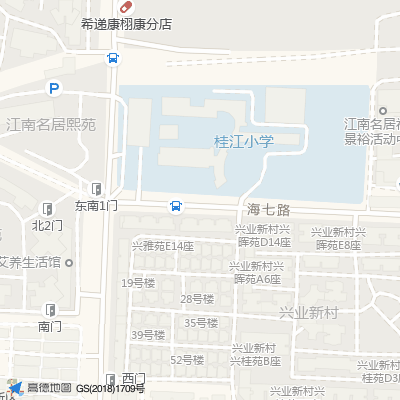

In [18]:
from PIL import Image
from io import BytesIO
def staticmap(location,zoom,size=None,scale=1,markers=None,labels=None,paths=None,traffic=0,page=None,sig=None)->dict:
    url = 'https://restapi.amap.com/v3/staticmap?parameters'
    params={
        'key':key_lm,
        'location':location,
        'zoom':zoom,
        'size':size,
        'scale':scale,
        'markers':markers,
        'labels':labels,
        'paths':paths,
        'traffic':traffic,
        'sig':sig,
        'output':'json'
    }
    response = requests.get(url,params=params)
    data = Image.open(BytesIO(response.content))
    return data
staticmap(location=桂江小学_location,zoom=16)

#### 思考 

* 静态地图服务通过返回一张地图图片响应HTTP请求，使用户能够将高德地图以图片形式嵌入自己的网页中。用户可以指定请求的地图位置、图片大小、以及在地图上添加覆盖物，如标签、标注、折线、多边形。我认为该功能中有涉及计算机视觉的功能，其用摄影机和电脑代替人眼对目标进行识别、跟踪和测量等机器视觉，并进一步做图形处理，使电脑处理成为更适合人眼观察或传送给仪器检测的图像。

----

## 坐标转换

In [19]:
def assistant(locations:str,coordsys:str):
    params = {
        'key':key_lm,
        'coordsys':coordsys,
        'locations': locations,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/coordinate/convert?parameters", params)
    data = response.json()['locations']
    return data
assistant("110.92499782059477,21.678348812949974|110.931788,21.684118",'gps')

'110.929509548612,21.675566677518;110.936314561632,21.681341688369'

#### 思考 

* 能够将用户输入的非高德坐标（GPS坐标、mapbar坐标、baidu坐标）转换成高德坐标。它能调用其他的坐标并转化能高德坐标，我认为它是用了后台的算法将其转化

---

## 天气查询

In [20]:
def weather(city:str):
    params = {
        'key':key_lm,
        'city':city,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/weather/weatherInfo?parameters", params)
    data = response.json()
    return data
weather('佛山')

{'status': '1',
 'count': '1',
 'info': 'OK',
 'infocode': '10000',
 'lives': [{'province': '广东',
   'city': '佛山市',
   'adcode': '440600',
   'weather': '晴',
   'temperature': '28',
   'winddirection': '东南',
   'windpower': '≤3',
   'humidity': '75',
   'reporttime': '2020-04-20 21:52:33'}]}

#### 思考 

* 天气查询是一个简单的HTTP接口，根据用户输入的adcode，查询目标区域当前/未来的天气情况。我认为这是简单的搜索查询，其背后不含有ML、AI的功能。

---

## 输入提示

In [21]:
def inputtips(keywords:str):
    params = {
        'key':key_lm,
        'keywords':keywords,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/assistant/inputtips?parameters", params)
    data = response.json()
    return data
inputtips('佛山')

{'status': '1',
 'count': '10',
 'info': 'OK',
 'infocode': '10000',
 'tips': [{'id': [],
   'name': '佛山市',
   'district': '广东省佛山市',
   'adcode': '440604',
   'location': [],
   'address': '禅城区',
   'typecode': '190104',
   'city': []},
  {'id': 'B02F5001DE',
   'name': '佛山汽车站',
   'district': '广东省佛山市禅城区',
   'adcode': '440604',
   'location': '113.110792,23.041375',
   'address': '汾江中路6号',
   'typecode': '150400',
   'city': []},
  {'id': 'B00160F172',
   'name': '佛山里',
   'district': '天津市河西区',
   'adcode': '120103',
   'location': '117.18832,39.099793',
   'address': '吴家窑二号路与河沿道交叉口西南150米',
   'typecode': '120302',
   'city': []},
  {'id': 'B013600YF6',
   'name': '佛山',
   'district': '河北省邯郸市永年区',
   'adcode': '130408',
   'location': '114.369142,36.718150',
   'address': [],
   'typecode': '190203',
   'city': []},
  {'id': 'B02EE01ATM',
   'name': '佛山',
   'district': '广东省江门市开平市',
   'adcode': '440783',
   'location': '112.734086,22.450622',
   'address': [],
   'typecode': '190203'

#### 思考 

* 该功能提供根据用户输入的关键词查询返回建议列表。我认为这是简单的搜索查询，其背后不含有ML、AI的功能。

---

## 交通态势

In [22]:
def rectangle(rectangle:str):
    params = {
        'key':key_lm,
        'rectangle':rectangle,
        'output':'json'
    }
    response = requests.get("https://restapi.amap.com/v3/traffic/status/rectangle?parameters", params)
    data = response.json()
    return data
rectangle('116.351147,39.966309;116.357134,39.968727')

{'status': '1',
 'info': 'OK',
 'infocode': '10000',
 'trafficinfo': {'description': '北三环路：双向畅通。',
  'evaluation': {'expedite': '100.00%',
   'congested': '0.00%',
   'blocked': '0.00%',
   'unknown': '0.00%',
   'status': '1',
   'description': '整体畅通'}}}

#### 思考

* 交通态势是一类简单的HTTP接口，提供根据用户输入的内容能够返回希望查询的交通态势情况，路况信息2分钟更新一次。我认为该功能有用到计算机视觉的功能，通过坐标点位到实际的地理位置，然后由图像处理、模式识别或图像识别、景物分析、图象理解等。进行空间形状的描述，几何建模以及认识过程最后实现图像理解

---

## 设计一个简单的应用

* 应用设计：
 * 一款app能根据当前地理位置及天气状况为用户提供适宜的音乐和建议可去周边位置

* 设计原因：
 * 用户的心境一般会因周围环境的变化而变化，在不同的天气需要不同的音乐来舒缓用户的心情，在对应不同的天气的同时交通态势也是不一样的，这时就需要用到路径规划来带用户另找他路，或者用周边搜索来给用户提供周边其他可去的地方

* 涉及的功能：
 * 1.搜索POI（周边搜索）
 * 2.天气查询
 * 3.路径规划
 * 4.交通态势